In [40]:
import os
from pprint import pprint
import numpy as np # type: ignore
import pandas as pd # type: ignore
from scipy.io.arff import loadarff # type: ignore
import seaborn as sns # type: ignore
%matplotlib inline
import matplotlib.pyplot as plt # type: ignore

In [41]:
data_test = loadarff(os.path.join("ECG5000", "ECG5000_TEST.arff"))
data_train = loadarff(os.path.join("ECG5000", "ECG5000_TRAIN.arff"))

In [42]:
class_names = ['Normal', 'R on T', 'PVC', 'SP', 'UB']
colors = plt.cm.rainbow

In [43]:
dataset = pd.concat([pd.DataFrame(data_test[0]), pd.DataFrame(data_train[0])])
dataset.shape #видим что в датасете 5000 примеров и 141 признак
dataset.keys()

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10',
       ...
       'att132', 'att133', 'att134', 'att135', 'att136', 'att137', 'att138',
       'att139', 'att140', 'target'],
      dtype='object', length=141)

In [44]:
dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,0.334577,...,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073,b'1'
1,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,-0.397999,...,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009,b'1'
2,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,-1.440680,...,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767,b'1'
3,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,b'1'
4,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,-0.521316,...,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,-1.359872,...,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161,b'4'
496,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,-0.891843,...,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958,b'4'
497,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,-1.690706,...,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028,b'4'
498,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,-0.434310,...,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534,b'5'


In [45]:
dataset["target"].value_counts()

target
b'1'    2919
b'2'    1767
b'4'     194
b'3'      96
b'5'      24
Name: count, dtype: int64

C:\Users\artio\AppData\Local\Temp\ipykernel_5156\1014747810.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names)


Text(0.5, 0, 'Классы')

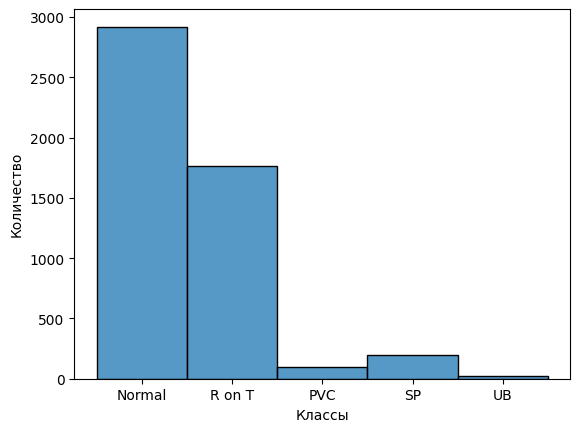

In [46]:
ax = sns.histplot(dataset["target"])
ax.set_xticklabels(class_names)
ax.set_ylabel("Количество")
ax.set_xlabel("Классы")


In [47]:
from numpy import float32
from pandas import DataFrame

df = DataFrame()

df["target"] = dataset["target"]
df["data"] = dataset.iloc[:, 25:80].values.astype(float32).tolist()
df

,target,data
0,b'1',"[0.20091362297534943, 0.10775283724069595, -0...."
1,b'1',"[-0.56536465883255, -0.6614174842834473, -0.60..."
2,b'1',"[-0.8130083084106445, -0.8555601239204407, -0...."
3,b'1',"[-0.5701583623886108, -0.7772442102432251, -0...."
4,b'1',"[-0.6069830656051636, -0.8067130446434021, -0...."
...,...,...
495,b'4',"[-0.12877734005451202, -0.18909484148025513, -..."
496,b'4',"[-0.05170086398720741, -0.020130416378378868, ..."
497,b'4',"[-0.1446286141872406, -0.16848643124103546, -0..."
498,b'5',"[-0.07897409051656723, -0.2221481055021286, -0..."


In [48]:
df.describe()

,target,data
count,5000,5000
unique,5,5000
top,b'1',"[0.20091362297534943, 0.10775283724069595, -0...."
freq,2919,1


Не факт что нужно это использовать, но почему бы и нет

In [49]:
def add_noise(signal, noise_level=0.05):
    """
    Добавление шума к сигналу.
    
    Args:
        signal (numpy.array): Исходный сигнал временного ряда.
        noise_level (float): Уровень шума для добавления.
        
    Returns:
        numpy.array: Сигнал с добавленным шумом.
    """
    noise = np.random.normal(scale=noise_level, size=len(signal))
    noisy_signal = signal + noise
    return noisy_signal

In [50]:
def augment_data_for_class(df, target_class, desired_rows, noise_level=0.05):
    """
    Создает таблицу заданного размера, состоящую из данных определенного класса и зашумленных данных.

    Args:
        df (pandas.DataFrame): DataFrame с двумя столбцами 'target' и 'data'.
        target_class: Значение класса для аугментации.
        desired_rows (int): Желаемое количество строк в результирующей таблице.
        noise_level (float): Уровень шума для добавления к данным.

    Returns:
        pandas.DataFrame: DataFrame, состоящий из данных определенного класса и зашумленных данных.
    """
    # Отфильтровать данные только для указанного класса
    class_data = df[df['target'] == target_class].copy()
    
    # Проверить, что количество строк в class_data достаточно для создания зашумленных данных
    if len(class_data) >= desired_rows:
        # Сгенерировать заданное количество зашумленных данных
        noise_data = [add_noise(class_data.iloc[i]['data'], noise_level) for i in range(desired_rows)]
    else:
        # Если данных недостаточно, создать столько зашумленных данных, сколько есть
        if len(class_data) > 0:
            noise_data = [add_noise(class_data.iloc[i % len(class_data)]['data'], noise_level) for i in range(desired_rows)]
        else:
            raise ValueError("No data available for class {}.".format(target_class))
    
    # Создать DataFrame с зашумленными данными
    noise_df = pd.DataFrame({'target': [target_class] * desired_rows, 'data': noise_data})
    
    # Объединить данные определенного класса с зашумленными данными
    result_df = pd.concat([class_data, noise_df], ignore_index=True)
       
    return result_df

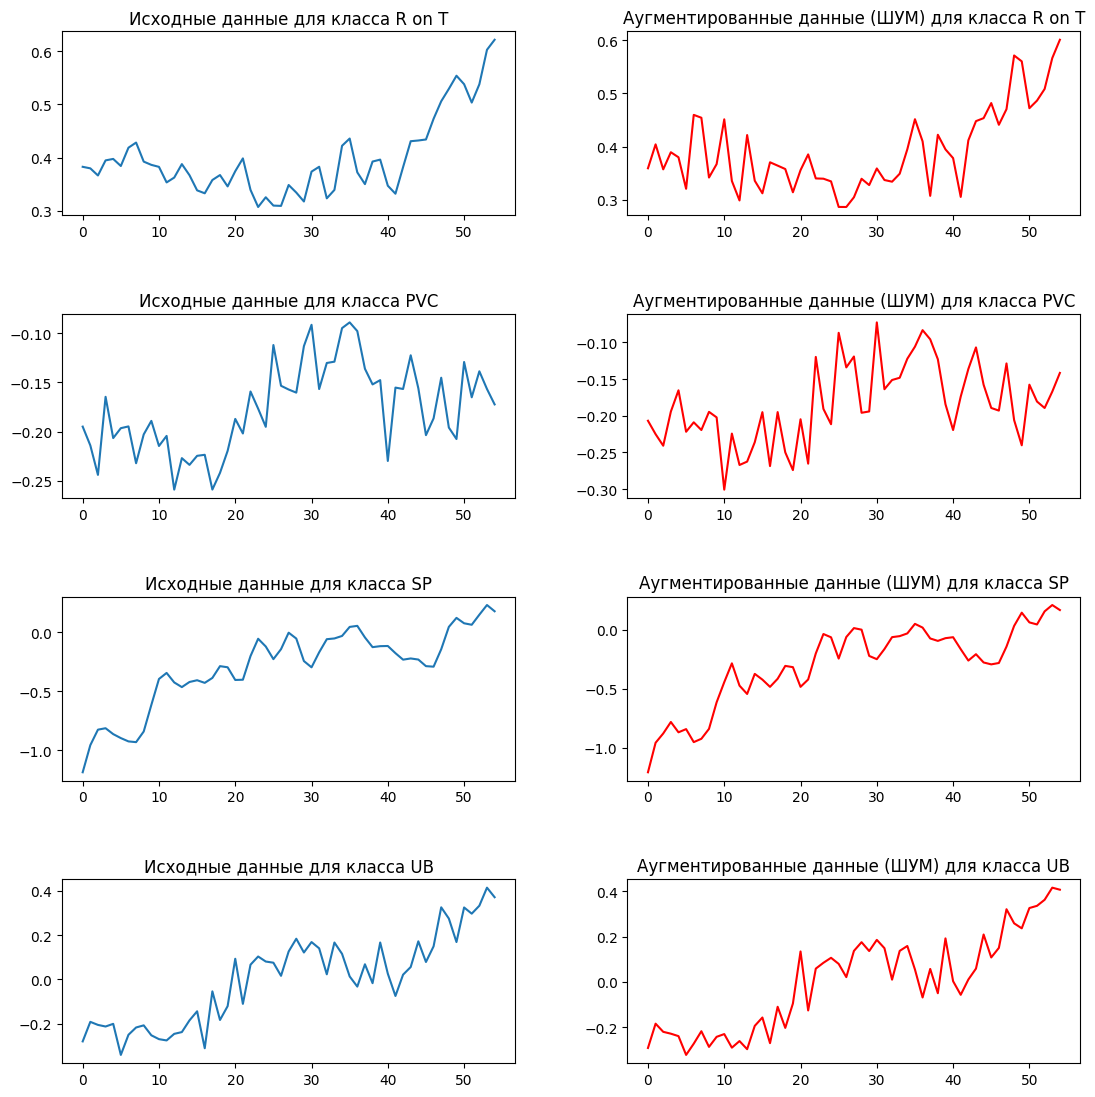

target
b'1'    2919
b'2'    2919
b'3'    2919
b'4'    2919
b'5'    2919
Name: count, dtype: int64

In [51]:
class_counts = df['target'].value_counts()
normal_class_counts = class_counts.get(b'1', 0)

# Задать уровень шума для добавления
noise_level = 0.03

res = df[df['target'] == b"1"]

fig, axs = plt.subplots(4, 2, figsize=(12, 12))
fig.tight_layout(pad=5.0)

for idx, target_class in enumerate(range(2, 6)):
    target_class = str(target_class).encode()
    shift = class_counts.get(target_class, 0)
    desired_rows = abs(normal_class_counts - shift)
    
    augmented_df = augment_data_for_class(df, target_class, desired_rows, noise_level)
    
    res = pd.concat([res, augmented_df], ignore_index=True)
    
    # Определить позицию subplot
    row, col = idx, 0
    axs[row, col].plot(df[df.target == target_class].data.iloc[0])
    axs[row, col].set_title('Исходные данные для класса {}'.format(class_names[int(target_class)-1]))
    
    row, col = idx, 1
    axs[row, col].plot(augmented_df.data.iloc[shift], color='red')
    axs[row, col].set_title('Аугментированные данные (ШУМ) для класса {}'.format(class_names[int(target_class)-1]))

plt.show()

df = res.sort_values(by='target').reset_index(drop=True)
df.target.value_counts()

C:\Users\artio\AppData\Local\Temp\ipykernel_5156\1369977716.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names)


Text(0.5, 0, 'Классы')

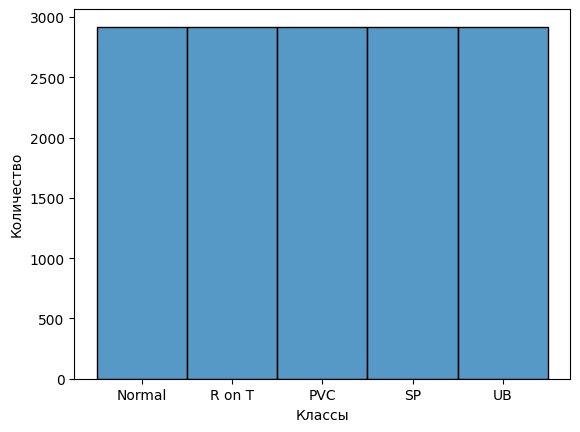

In [52]:
ax = sns.histplot(df["target"])
ax.set_xticklabels(class_names)
ax.set_ylabel("Количество")
ax.set_xlabel("Классы")

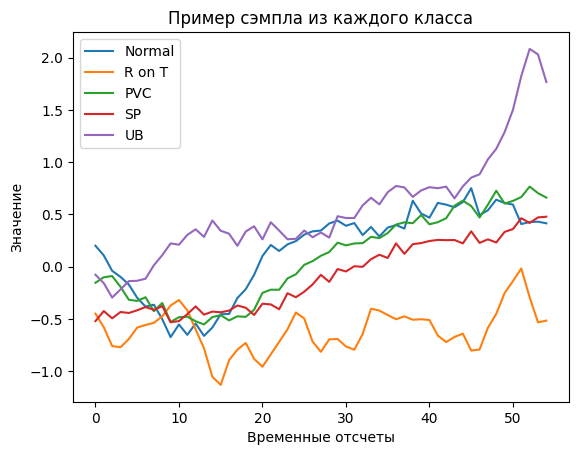

In [53]:
# Выбор уникальных строк по уникальным значениям в столбце 'столбец_1'
unique_rows = df.drop_duplicates(subset=['target'])

# Настройка заголовка и меток осей
plt.title('Пример сэмпла из каждого класcа')
plt.xlabel('Временные отсчеты')
plt.ylabel('Значение')
for index_, class_ in enumerate(unique_rows.data):
    plt.plot(class_, label=f'{class_names[index_]}')
plt.legend()


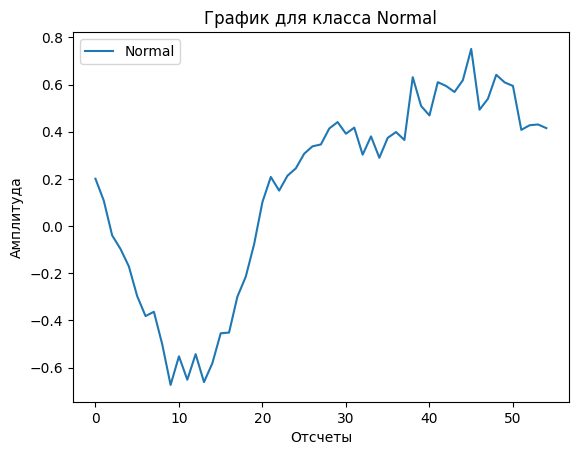

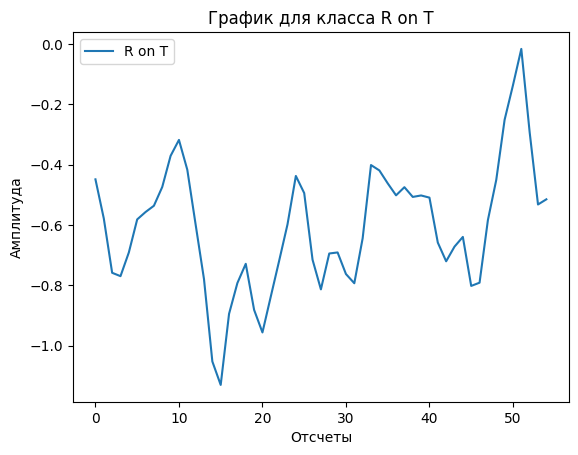

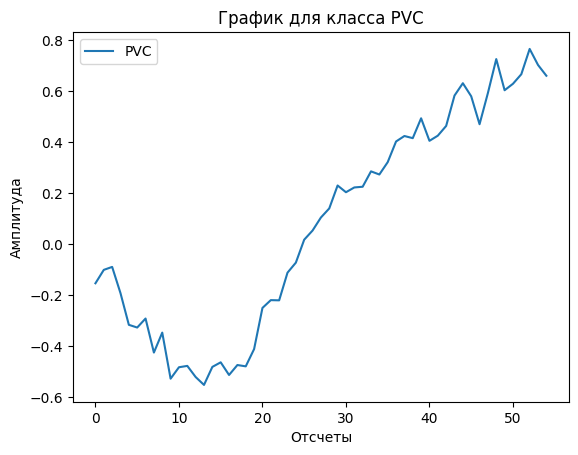

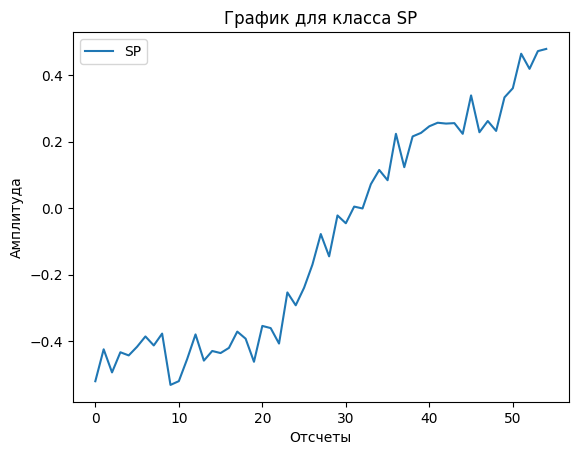

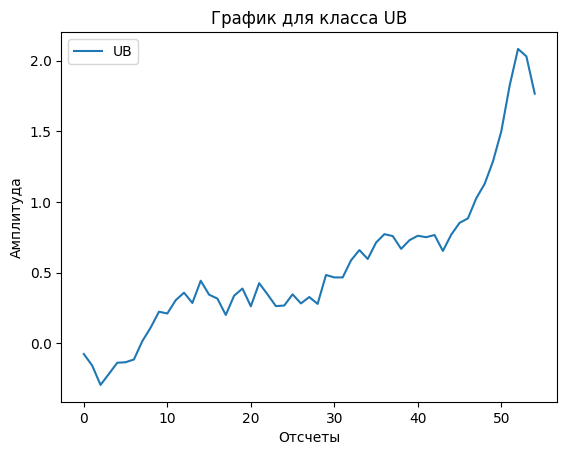

In [54]:
unique_targets = df['target'].unique().tolist()

for target in unique_targets:
    # Фильтрация данных по текущему классу
    class_data = df[df['target'] == target]
    
    # Выбор уникальных строк для текущего класса по уникальным значениям в столбце 'столбец_1'
    unique_rows = class_data.drop_duplicates(subset=['target'])
    # Построение графика для текущего класса
    plt.figure()
    for index_, sample_ in enumerate(unique_rows.data):
        plt.plot(sample_, label=f"{class_names[int(target)-1]}")
    plt.legend()
    plt.title(f'График для класса {class_names[int(target)-1]}')
    plt.xlabel('Отсчеты')
    plt.ylabel('Амплитуда')
    plt.show()


Нормализация данных ЭКГ с использованием Z-score Normalization с помощью библиотеки scikit-learn в Python


<b>Z-оценка (Z-score)</b> - это один из методов нормализации данных, который приводит значения признаков к стандартному нормальному распределению со средним значением 0 и стандартным отклонением 1. Этот метод полезен, когда данные имеют разные масштабы или когда распределение данных неизвестно.

In [55]:
#создаем опять датасет после всех его изменений

dataset = pd.DataFrame(df.data.tolist())
dataset["target"] = df.target

dataset


,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,target
0,0.200914,0.107753,-0.039165,-0.096833,-0.170630,-0.296952,-0.381269,-0.363097,-0.501362,-0.673076,...,0.493459,0.539522,0.641263,0.609352,0.594058,0.407904,0.427613,0.430856,0.415287,b'1'
1,-0.215851,-0.342165,-0.218326,-0.362915,-0.395155,-0.608643,-0.642595,-0.750177,-0.663391,-0.694234,...,0.765747,0.832918,0.663036,0.715826,0.687783,0.661159,0.711863,0.692140,0.511295,b'1'
2,-0.815004,-0.853354,-0.894854,-0.950443,-0.931333,-0.957242,-0.998003,-1.040047,-1.127234,-1.133717,...,0.102061,0.117145,0.110839,0.175673,0.188611,0.246260,0.229064,0.191927,0.218800,b'1'
3,-0.658365,-0.603082,-0.677642,-0.819416,-0.699936,-0.794074,-0.911420,-0.986921,-0.998737,-1.038291,...,0.633458,0.706668,0.618823,0.796438,0.733880,0.697771,0.693570,0.571816,0.595031,b'1'
4,0.934439,0.984787,1.040934,1.046289,1.020340,0.952787,0.824788,0.761749,0.645676,0.505706,...,-0.029263,-0.035784,-0.041991,-0.102254,-0.174943,-0.110532,-0.071785,-0.056552,-0.072015,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14590,-0.320626,-0.037092,-0.043358,0.073924,0.111982,0.324509,0.367515,0.411354,0.440173,0.319832,...,0.419176,0.420909,0.288201,0.406201,0.308940,0.300581,0.345457,0.521721,0.621113,b'5'
14591,-0.426765,-0.145879,-0.075075,-0.061407,0.144502,0.161435,0.113928,-0.013528,-0.111399,-0.118169,...,0.640911,0.417850,0.238259,0.396411,0.703440,0.726148,0.283117,-0.041939,0.084928,b'5'
14592,0.232609,0.089389,0.103350,0.117829,0.129355,0.151225,0.045330,-0.028092,-0.001221,-0.028721,...,0.414461,0.636272,0.592092,0.503084,0.519392,0.566628,0.577793,0.632561,0.591381,b'5'
14593,-0.742865,-0.707274,-0.637726,-0.661091,-0.725590,-0.722955,-0.766341,-0.712017,-0.627116,-0.646508,...,0.696928,0.617702,0.744891,0.625316,0.469455,0.478245,0.504190,0.526963,0.506022,b'5'


In [56]:
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler

data = dataset.iloc[:, :-1].values.astype(float32)
pprint(f"Средние значения: {data.mean()}")
pprint(f"Стандартное отклонение: {data.std()}")

scaler = StandardScaler()
normalized_features = scaler.fit_transform(data)
normalized_features

'Средние значения: 0.06006317213177681'
'Стандартное отклонение: 0.4696957767009735'


array([[ 0.4971566 ,  0.37090686,  0.15184228, ...,  0.11034925,
         0.09491416,  0.00678434],
       [-0.19298173, -0.37710366, -0.15848476, ...,  0.9982196 ,
         0.8951746 ,  0.31568995],
       [-1.1851442 , -1.2269804 , -1.3303058 , ..., -0.5098288 ,
        -0.6368763 , -0.6254153 ],
       ...,
       [ 0.54964286,  0.34037575,  0.39869338, ...,  0.57944643,
         0.7126943 ,  0.57336813],
       [-1.065685  , -0.98411554, -0.88493305, ...,  0.34954152,
         0.3892704 ,  0.29872465],
       [-0.4386093 , -0.572704  , -0.68040985, ...,  0.54776984,
        -0.04036103,  0.07670494]], dtype=float32)

l2 нормализация используется если выбросы играют важную роль

In [57]:
normalized_features_l2 = normalize(data, norm="l2")

In [58]:
scaler = MinMaxScaler()
normalized_features_min_max = scaler.fit_transform(data)
normalized_features_min_max

array([[0.6920049 , 0.6698906 , 0.64676756, ..., 0.64554435, 0.65899366,
        0.69614553],
       [0.61931694, 0.58889985, 0.6151855 , ..., 0.7048136 , 0.71214193,
        0.7164741 ],
       [0.5148186 , 0.49687964, 0.49592894, ..., 0.6041447 , 0.61039275,
        0.6545415 ],
       ...,
       [0.697533  , 0.6665848 , 0.6718897 , ..., 0.67685866, 0.7000227 ,
        0.73343146],
       [0.5274005 , 0.5231758 , 0.54125464, ..., 0.6615115 , 0.678543  ,
        0.71535766],
       [0.5934465 , 0.5677213 , 0.56206906, ..., 0.67474407, 0.6500095 ,
        0.7007469 ]], dtype=float32)

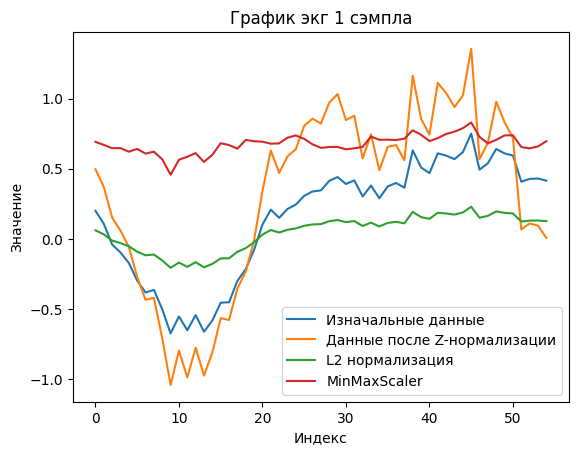

In [59]:
plt.title('График экг 1 сэмпла')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.plot(data[0], label='Изначальные данные')
plt.plot(normalized_features[0], label='Данные после Z-нормализации')
plt.plot(normalized_features_l2[0], label='L2 нормализация')
plt.plot(normalized_features_min_max[0], label='MinMaxScaler')
plt.legend()

In [62]:
dataset = pd.DataFrame(normalized_features.tolist())
dataset["target"] = df.target

dataset

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,target
0,0.200914,0.107753,-0.039165,-0.096833,-0.170630,-0.296952,-0.381269,-0.363097,-0.501362,-0.673076,...,0.493459,0.539522,0.641263,0.609352,0.594058,0.407904,0.427613,0.430856,0.415287,b'1'
1,-0.215851,-0.342165,-0.218326,-0.362915,-0.395155,-0.608643,-0.642595,-0.750177,-0.663391,-0.694234,...,0.765747,0.832918,0.663036,0.715826,0.687783,0.661159,0.711863,0.692140,0.511295,b'1'
2,-0.815004,-0.853354,-0.894854,-0.950443,-0.931333,-0.957242,-0.998003,-1.040047,-1.127234,-1.133717,...,0.102061,0.117145,0.110839,0.175673,0.188611,0.246260,0.229064,0.191927,0.218800,b'1'
3,-0.658365,-0.603082,-0.677642,-0.819416,-0.699936,-0.794074,-0.911420,-0.986921,-0.998737,-1.038291,...,0.633458,0.706668,0.618823,0.796438,0.733880,0.697771,0.693570,0.571816,0.595031,b'1'
4,0.934439,0.984787,1.040934,1.046289,1.020340,0.952787,0.824788,0.761749,0.645676,0.505706,...,-0.029263,-0.035784,-0.041991,-0.102254,-0.174943,-0.110532,-0.071785,-0.056552,-0.072015,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14590,-0.320626,-0.037092,-0.043358,0.073924,0.111982,0.324509,0.367515,0.411354,0.440173,0.319832,...,0.419176,0.420909,0.288201,0.406201,0.308940,0.300581,0.345457,0.521721,0.621113,b'5'
14591,-0.426765,-0.145879,-0.075075,-0.061407,0.144502,0.161435,0.113928,-0.013528,-0.111399,-0.118169,...,0.640911,0.417850,0.238259,0.396411,0.703440,0.726148,0.283117,-0.041939,0.084928,b'5'
14592,0.232609,0.089389,0.103350,0.117829,0.129355,0.151225,0.045330,-0.028092,-0.001221,-0.028721,...,0.414461,0.636272,0.592092,0.503084,0.519392,0.566628,0.577793,0.632561,0.591381,b'5'
14593,-0.742865,-0.707274,-0.637726,-0.661091,-0.725590,-0.722955,-0.766341,-0.712017,-0.627116,-0.646508,...,0.696928,0.617702,0.744891,0.625316,0.469455,0.478245,0.504190,0.526963,0.506022,b'5'


Видим, что лучшей оказалась минимаксная нормализация, тк она лучше всего описывает график

In [61]:
dataset.to_csv("dataset.csv", index=False)